In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def get_data(data_path):
    """Takes filepath to raw data, transforms it, and returns
    """
    df = pd.read_json(data_path)
    return df

In [5]:
data = get_data('../../data/data.json')

In [6]:
data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [7]:
#data.info()

In [8]:
rows_with_null=data.isnull().sum()[data.isnull().sum()!=0]
print(rows_with_null)

country              81
delivery_method      16
event_published      99
has_header         5409
org_facebook         59
org_twitter          59
sale_duration       155
venue_country      1076
venue_latitude     1076
venue_longitude    1076
venue_name         1076
venue_state        1076
dtype: int64


In [9]:
data['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [10]:
data['is_fraud'] = data['acct_type'].apply(lambda x: 1 if 'fraud' in x else 0)

In [11]:
data.is_fraud.value_counts()

0    13044
1     1293
Name: is_fraud, dtype: int64

In [12]:
fraud_acc = data[data['is_fraud']==True]

In [13]:
non_fraud_acc = data[data['is_fraud']==False]

In [14]:
fraud_acc.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'is_fraud'],
      dtype='object')

In [15]:
fraud_acc.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,is_fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,42,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY,1
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,77,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,1
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,0,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,,1
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,0,1316795486,1,5801 Security Blvd,US,39.308752,-76.716174,,MD,1


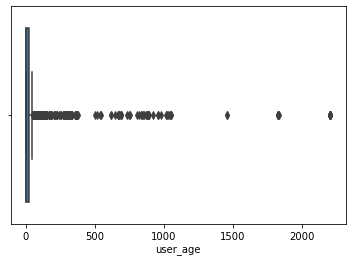

In [16]:
sns.boxplot(x="user_age", data=fraud_acc)

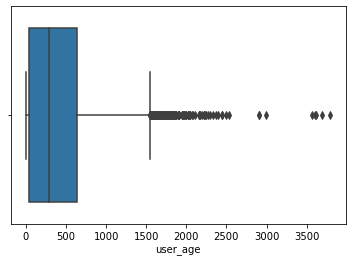

In [17]:
sns.boxplot(x="user_age", data=non_fraud_acc)

In [18]:
fraud_acc.user_age.value_counts()

0       725
1        36
2        26
5        19
18       18
       ... 
115       1
117       1
118       1
301       1
1834      1
Name: user_age, Length: 197, dtype: int64

[None]

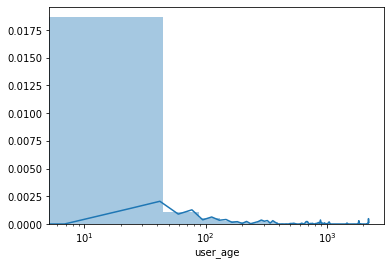

In [19]:
ax=sns.distplot(fraud_acc.user_age)
ax.set(xscale='log')

[None]

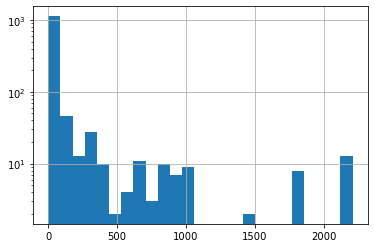

In [20]:

ax=fraud_acc.user_age.hist(bins=25)
ax.set(yscale='log')

[None]

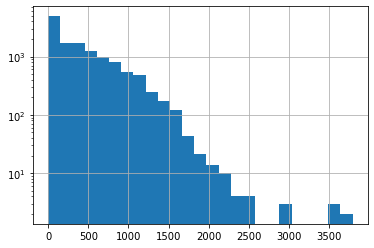

In [21]:
ax=non_fraud_acc.user_age.hist(bins=25)
ax.set(yscale='log')

Text(0.5, 0, 'Account Type')

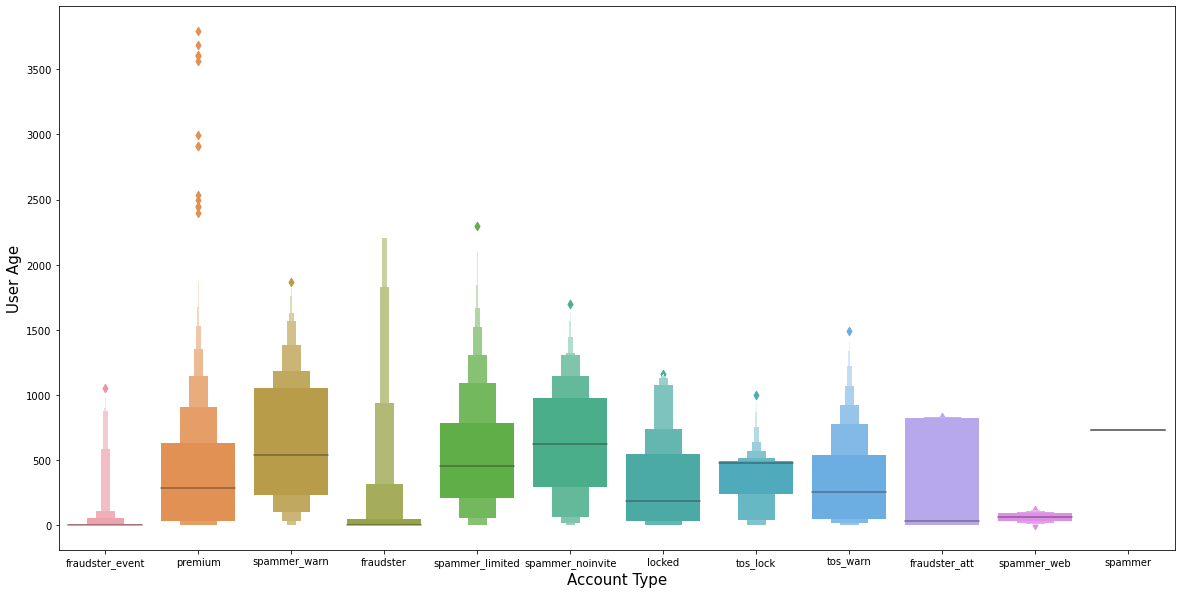

In [45]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax=sns.boxenplot(y='user_age',x="acct_type", data=data)
ax.set_ylabel('User Age', fontsize=15)
ax.set_xlabel('Account Type', fontsize=15)

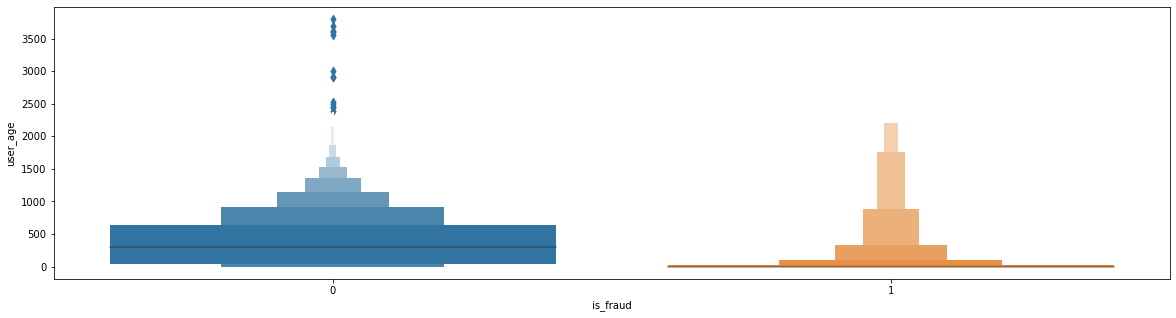

In [46]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax=sns.boxenplot(y='user_age',x="is_fraud", data=data)

In [24]:
fraud_acc.has_logo.value_counts()

1    835
0    458
Name: has_logo, dtype: int64

In [25]:
non_fraud_acc.has_logo.value_counts()

1    11238
0     1806
Name: has_logo, dtype: int64

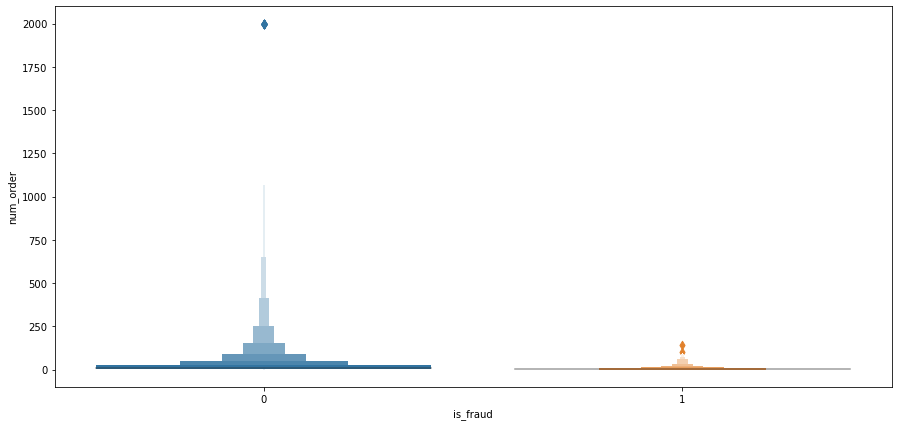

In [39]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
ax=sns.boxenplot(y='num_order',x="is_fraud", data=data)

In [27]:
non_fraud_acc.currency.value_counts()

USD    8838
GBP    1879
CAD    1280
AUD     767
EUR     225
NZD      55
Name: currency, dtype: int64

In [28]:
fraud_acc.currency.value_counts()

USD    858
GBP    343
CAD     42
EUR     37
AUD     12
MXN      1
Name: currency, dtype: int64

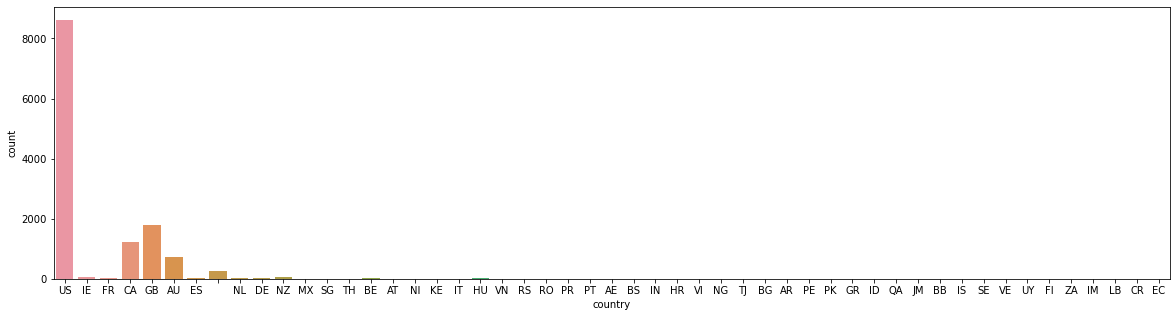

In [34]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax=sns.countplot(x='country', data=non_fraud_acc)

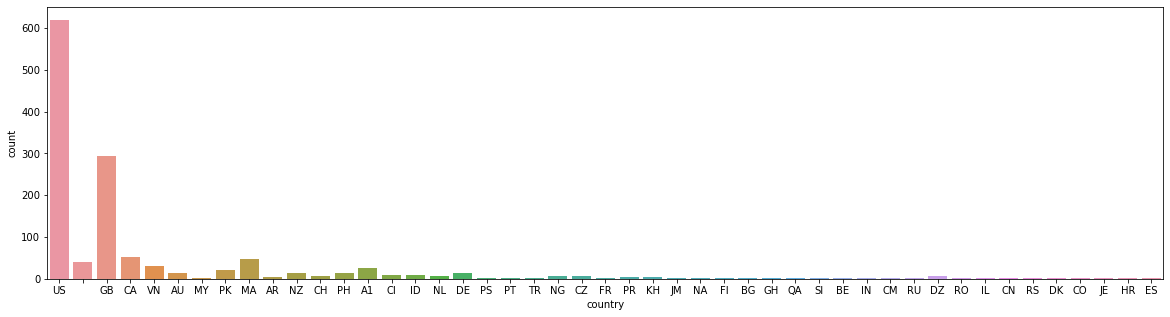

In [35]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax=sns.countplot(x='country', data=fraud_acc)

[None]

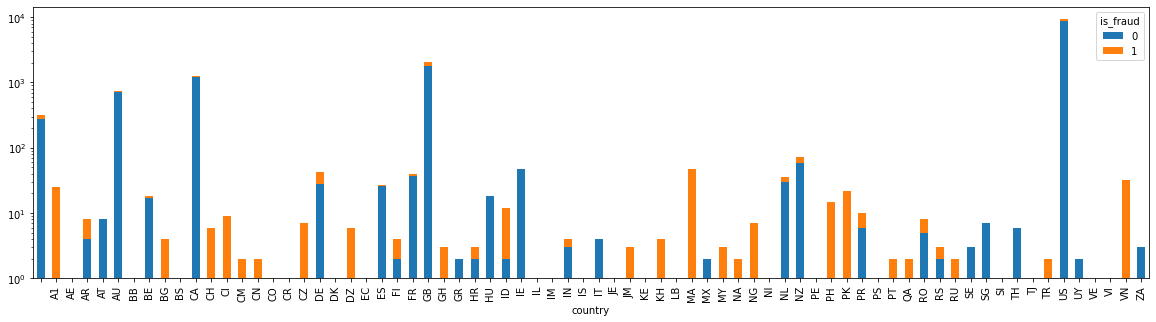

In [36]:
#fig, ax = plt.subplots(1,1, figsize=(20,10))
#ax=sns.plot(x='country', hue='is_fraud',data=data, stacked=True)
df_plot = data.groupby(['country', 'is_fraud']).size().reset_index().pivot(columns='is_fraud', index='country', values=0)
ax = df_plot.plot(kind='bar', stacked=True, figsize=(20,5))
ax.set(yscale='log')

Text(0.5, 1.0, 'Correlation betwen columns')

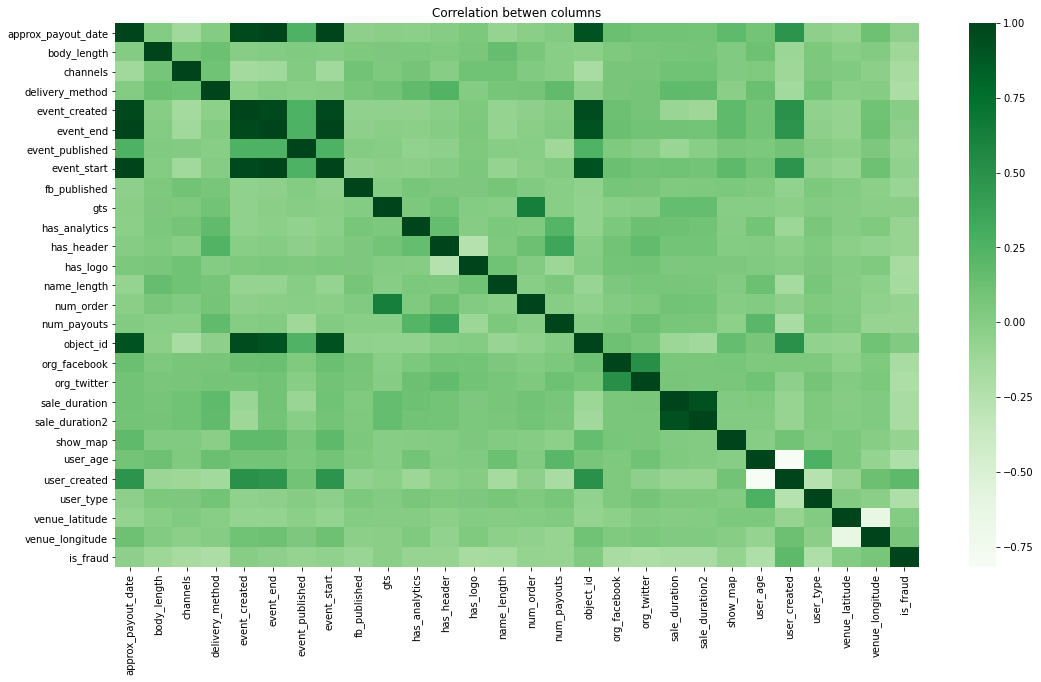

In [32]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),cmap='Greens',annot=False)
plt.title('Correlation betwen columns')